This is just a suggestion  from course

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import utilities

In [3]:
from importlib import reload

In [63]:
reload(utilities)

<module 'utilities' from 'C:\\Users\\luisr\\SharedProjects\\HowToWinKaggle\\FinalProject\\utilities.py'>

In [33]:
sales = utilities.load_and_preprocess()

In [34]:
agg_sales = utilities.aggregate_monthly(sales)

In [35]:
agg_sales

,Month,shop_id,item_id,item_cnt_month,item_price
0,2013-01,0,32,6.0,221.0
1,2013-01,0,33,3.0,347.0
2,2013-01,0,35,1.0,247.0
3,2013-01,0,43,1.0,221.0
4,2013-01,0,51,2.0,128.5
...,...,...,...,...,...
1609119,2015-10,59,22087,6.0,119.0
1609120,2015-10,59,22088,2.0,119.0
1609121,2015-10,59,22091,1.0,179.0
1609122,2015-10,59,22100,1.0,629.0


In [72]:
prediction = agg_sales[agg_sales.Month == '2015-10'].rename(columns={'item_cnt_month':'Prediction'})[['shop_id', 'item_id', 'Prediction']]

In [73]:
prediction.Prediction = np.clip(prediction.Prediction, 0, 20).describe()

In [74]:
submission = utilities.merge_pred_with_test(prediction, pred_col='Prediction')

In [75]:
submission.to_csv('submissions/oct2015_values_clipped.csv')

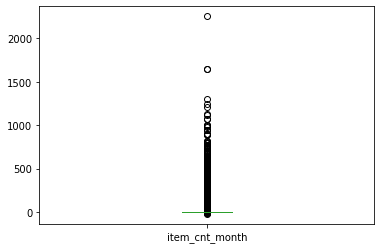

In [79]:
agg_sales.item_cnt_month.plot.box()

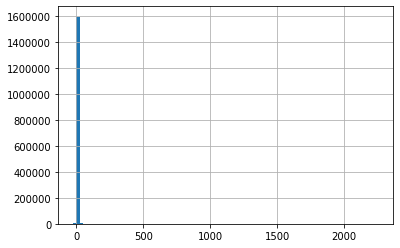

In [82]:
agg_sales.item_cnt_month.hist(bins=100)

In [84]:
agg_sales.item_cnt_month.sort_values(ascending=False).head(30)

1582127    2253.0
1574410    1644.0
1552020    1644.0
657943     1305.0
1412964    1242.0
1226814    1209.0
1297110    1127.0
1574411    1117.0
1145839    1074.0
645159     1066.0
1261077    1000.0
1216309     997.0
598233      989.0
547503      978.0
495702      950.0
767444      941.0
1071878     904.0
854863      903.0
716728      899.0
1190543     888.0
441060      820.0
1387817     813.0
684724      806.0
383106      799.0
1248651     795.0
587962      795.0
1219518     792.0
814839      776.0
1173809     772.0
944147      771.0
Name: item_cnt_month, dtype: float64